In [1]:
from fastai import *
from fastai.vision import *

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [13]:
path_data = "/home/jupyter/projects/noodleClassifier/data/"
noodle_types = ["penne", "maccheroni","fusilli","farfalle","spaghetti","udon"]
txt = ".txt"

In [14]:
for noodle in noodle_types:
    noodle_path = path_data + noodle + txt
    print(noodle_path)

/home/jupyter/projects/noodleClassifier/data/penne.txt
/home/jupyter/projects/noodleClassifier/data/maccheroni.txt
/home/jupyter/projects/noodleClassifier/data/fusilli.txt
/home/jupyter/projects/noodleClassifier/data/farfalle.txt
/home/jupyter/projects/noodleClassifier/data/spaghetti.txt
/home/jupyter/projects/noodleClassifier/data/udon.txt


In [ ]:
# to do:
# write webcrawler to replace manual work

In [20]:
for noodle in noodle_types:
    noodle_dest = Path(path_data + noodle)
    print(noodle_dest)
    noodle_dest.mkdir(parents=True, exist_ok=True)
    download_images(Path(path_data + noodle + txt), path_data + noodle, max_pics=200)
    verify_images(noodle_dest, delete=True)

In [21]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path_data, train=".", valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=224,
                                 num_workers=4).normalize(imagenet_stats)

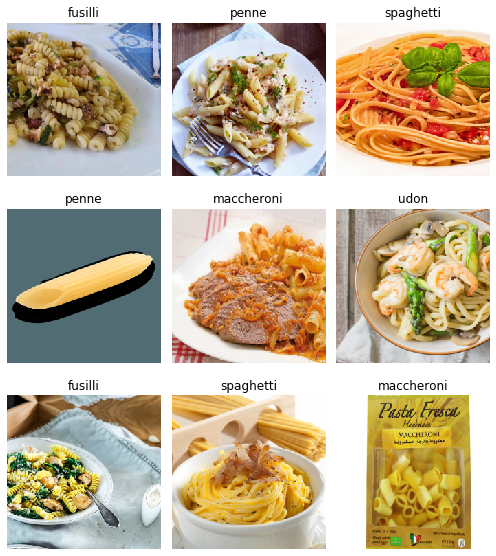

In [22]:
data.show_batch(rows=3, figsize=(7,8))

In [23]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['farfalle', 'fusilli', 'maccheroni', 'penne', 'spaghetti', 'udon'],
 6,
 457,
 114)

In [25]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [26]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.517160,1.996967,0.526316,00:11
1,1.830594,1.065470,0.315789,00:11
2,1.362929,0.792040,0.245614,00:12
3,1.127334,0.737543,0.210526,00:12


In [28]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.507989,0.697640,0.192982,00:12
1,0.446354,0.742230,0.210526,00:12
2,0.441019,0.730973,0.192982,00:12
3,0.408225,0.724677,0.201754,00:11


In [29]:
learn.save("state_1")

In [30]:
learn.unfreeze()

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


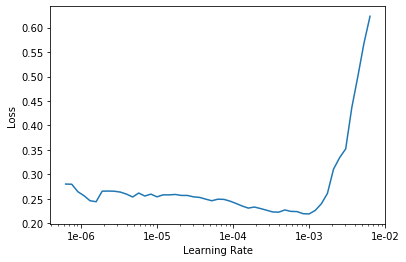

In [35]:
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.319067,0.736720,0.201754,00:13
1,0.295939,0.706704,0.192982,00:12


In [45]:
learn.save('stage_2')

In [37]:
interp = ClassificationInterpretation.from_learner(learn)

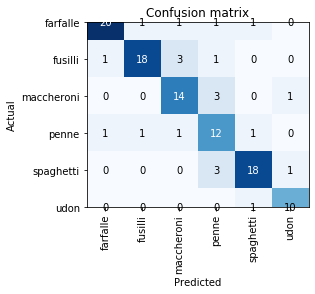

In [39]:
interp.plot_confusion_matrix()

In [38]:
interp.most_confused()

[('fusilli', 'maccheroni', 3),
 ('maccheroni', 'penne', 3),
 ('spaghetti', 'penne', 3),
 ('farfalle', 'fusilli', 1),
 ('farfalle', 'maccheroni', 1),
 ('farfalle', 'penne', 1),
 ('farfalle', 'spaghetti', 1),
 ('fusilli', 'farfalle', 1),
 ('fusilli', 'penne', 1),
 ('maccheroni', 'udon', 1),
 ('penne', 'farfalle', 1),
 ('penne', 'fusilli', 1),
 ('penne', 'maccheroni', 1),
 ('penne', 'spaghetti', 1),
 ('spaghetti', 'udon', 1),
 ('udon', 'spaghetti', 1)]

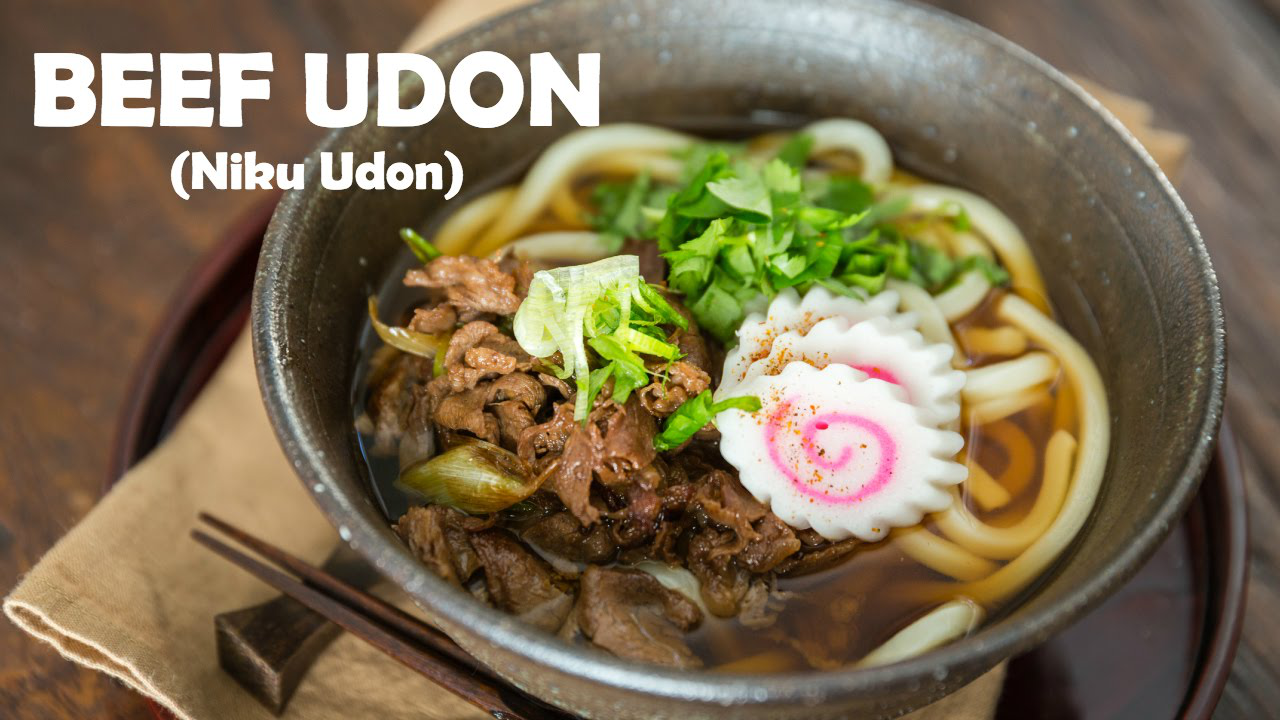

In [62]:
img = open_image(Path(path_data)/'udon'/'00000001.jpg')
img

In [61]:
noodle_types

['penne', 'maccheroni', 'fusilli', 'farfalle', 'spaghetti', 'udon']

In [63]:
data2 = ImageDataBunch.single_from_classes(path_data, noodle_types, 
                                          ds_tfms=get_transforms(),
                                          size=224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.resnet34)
learn.load('stage_2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/jupyter/projects/noodleClassifier/data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /home/jupyter/projects/noodleClassifier/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, moment

In [64]:
pred_class, pred_idx, outputs = learn.predict(img);
pred_class

Category udon